<a href="https://colab.research.google.com/github/Serkalem-negusse1/Whisper-Comparison/blob/main/tiny_Whisper_ASR_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Language Proficiency Test - ASR Transcriptions
##Tiny

#Step 1: Environment Setup

In [1]:
!pip install -q git+https://github.com/openai/whisper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00


In [2]:
!apt-get update && apt-get install -y ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,966 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 https://r2u.stat.illino

In [3]:
# Install dependencies
!pip install transformers datasets torchaudio git+https://github.com/openai/whisper.git --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.7 MB/s eta 0:00:00


In [5]:
# Step 1: Install dependencies
!pip install -q datasets transformers torchaudio evaluate jiwer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s eta 0:00:00


# **Step 2: Fine Tunining**

In [7]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Define the Google Drive directory
gdrive_output_dir = "/content/drive/MyDrive/NLP_Project/tinymodel/tiny_whisper_model" #for large whisper

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Step 4: Import packages
from datasets import Dataset, Audio, load_metric
from transformers import (
    WhisperProcessor,
    WhisperForConditionalGeneration,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq
)
import matplotlib.pyplot as plt
import torch
import evaluate
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
from typing import Any, Dict, List, Union

# Load WER metric
wer_metric = load_metric("wer")

<ipython-input-2-fe8598f073f6>:19: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")


In [ ]:
# Step 5: Accept local CSV dataset (request upload)
from google.colab import files
uploaded = files.upload()  # Upload your CSV with 'audio' (file path) and 'text' columns
csv_file = list(uploaded.keys())[0]

# Step 6: Load dataset using pandas and convert to Hugging Face Dataset
try:
    data = pd.read_csv(csv_file, encoding='latin-1') # Try latin-1 encoding first
except UnicodeDecodeError:
    data = pd.read_csv(csv_file, encoding='cp1252') # If latin-1 fails, try cp1252

dataset = Dataset.from_pandas(data)

Saving newvtwhisperdataset.csv to newvtwhisperdataset (1).csv


In [ ]:
# Step 7: Load and cast audio column
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [ ]:
# Step 8: Load Whisper model & processor
# it loads the pre-trained Whisper model and its associated processor from Hugging Face's model hub
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [ ]:
# Step 9: Preprocessing function
def preprocess_function(example):
    audio = example["audio"]
    input_features = processor(audio["array"], sampling_rate=16000).input_features[0]
    # Truncate labels to a maximum length (e.g., 128)
    # there was an error due to too-much token, then i handle it by setting max_length==128 and enable truncate
    label_ids = processor.tokenizer(example["text"], max_length=128, truncation=True).input_ids
    return {
        "input_features": input_features,
        "labels": label_ids,
        "text": example["text"], # Keep text for later evaluation if needed
    }

# Step 10: Apply preprocessing
encoded_dataset = dataset.map(preprocess_function)

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

In [ ]:
# Step 11: Define custom data collator

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]

        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [ ]:
# Step 12: Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir=gdrive_output_dir,
    per_device_train_batch_size=2,
    num_train_epochs=3,
    logging_steps=10,
    save_steps=50,
    save_total_limit=2,
    report_to=["wandb"],  # Optional: remove if not using Weights & Biases
    predict_with_generate=True,  # Needed for generation-based evaluation
)

In [ ]:
#Defining WER computation Function
def compute_wer(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}

In [ ]:
# Step 13: Define trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset,
    eval_dataset=encoded_dataset,  # Replace with valid eval set if available
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,  # Or processor.tokenizer if applicable
    compute_metrics=compute_wer
)

<ipython-input-13-0a5f8b03c883>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
# Step 14: Train
trainer.train()
# Step 15: Save the fine-tuned model & processor to Google Drive
model.save_pretrained(gdrive_output_dir)
processor.save_pretrained(gdrive_output_dir)
print(f"Fine-tuned model saved at: {gdrive_output_dir}")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: serkalemnegusse1 (serkalemnegusse1-kotebe-university-education) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,2.660300
20,3.199500
30,3.779200


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


✅ Fine-tuned model saved at: /content/drive/MyDrive/NLP_Project/LargeModel/newwhisper_finetuned_model


In [ ]:
# Step 15: Save the fine-tuned model & processor to Google Drive
model.save_pretrained(gdrive_output_dir)
processor.save_pretrained(gdrive_output_dir)
print(f"✅ Fine-tuned model saved at: {gdrive_output_dir}")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: serkalemnegusse1 (serkalemnegusse1-kotebe-university-education) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,2.660300
20,3.199500
30,3.779200


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


✅ Fine-tuned model saved at: /content/drive/MyDrive/NLP_Project/newwhisper_finetuned_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Step 16: Evaluate WER
results = trainer.evaluate()
print(f"Word Error Rate (WER): {results['eval_wer']:.4f}")

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Word Error Rate (WER): 1.3335


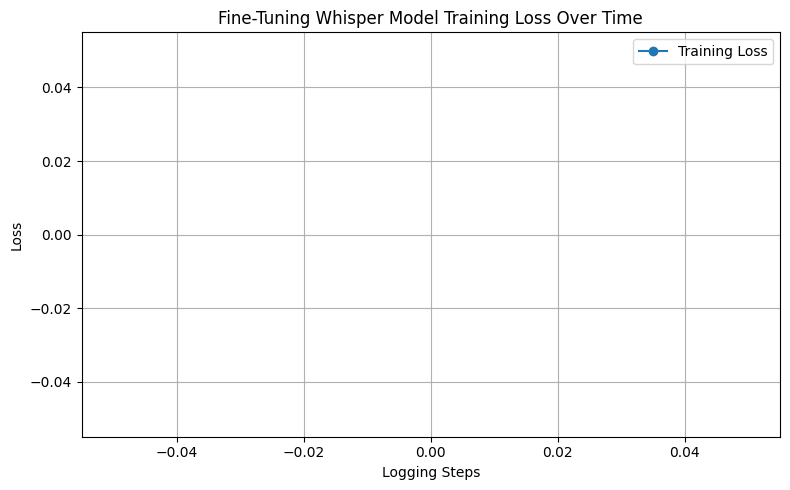

In [ ]:
#Step 17: Plot Training Loss
log_history = trainer.state.log_history
losses = [log["loss"] for log in log_history if "loss" in log]
steps = list(range(1, len(losses) + 1))

plt.figure(figsize=(8, 5))
plt.plot(steps, losses, marker="o", label="Training Loss")
plt.xlabel("Logging Steps")
plt.ylabel("Loss")
plt.title("Fine-Tuning Whisper Model Training Loss Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Step